In [1]:
# only for cuda enabled laptop and desktop

In [2]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[]


In [3]:
# TensorFlow and tf.keras

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
# Helper libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
print(tf.__version__)
print(np.__version__)

2.6.2
1.19.5


In [8]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
train_labels[0]

9

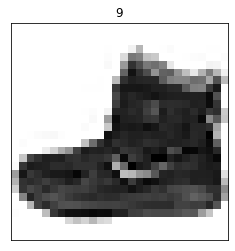

In [15]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(train_labels[0])
plt.xticks([])
plt.yticks([])
plt.show()

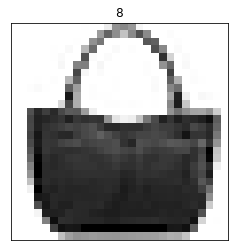

In [16]:
plt.imshow(train_images[100],cmap='gray_r')
plt.title(train_labels[100])
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
class_names[0]

'T-shirt/top'

In [20]:
test_labels[0]

9

In [21]:
class_names[test_labels[0]]

'Ankle boot'

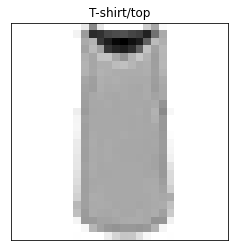

In [22]:
plt.imshow(train_images[2],cmap='gray_r')
plt.title(class_names[train_labels[2]])
plt.xticks([])
plt.yticks([])
plt.show()

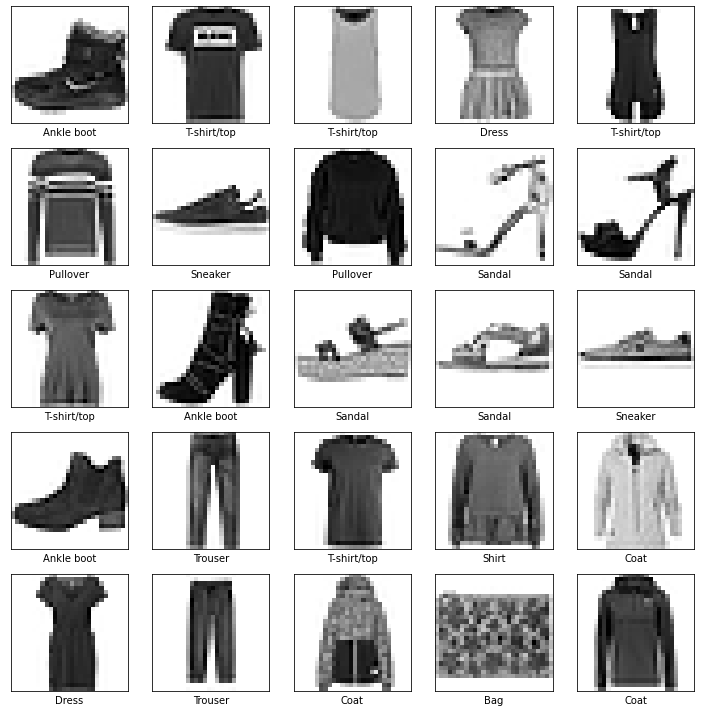

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [24]:
train_images = train_images / 255.0

In [25]:
test_images = test_images / 255.0

In [26]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10,'softmax')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
history = model.fit(train_images, train_labels,validation_split=0.2, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4960 - accuracy: 0.8246 - val_loss: 0.4088 - val_accuracy: 0.8523
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3710 - accuracy: 0.8639 - val_loss: 0.3580 - val_accuracy: 0.8717
Epoch 3/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3273 - accuracy: 0.8797 - val_loss: 0.3448 - val_accuracy: 0.8711
Epoch 4/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3050 - accuracy: 0.8882 - val_loss: 0.3336 - val_accuracy: 0.8783
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2858 - accuracy: 0.8950 - val_loss: 0.3490 - val_accuracy: 0.8746
Epoch 6/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2698 - accuracy: 0.9001 - val_loss: 0.3154 - val_accuracy: 0.8873
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2581 - accuracy: 0.9048 - val_loss: 0.3035 - val_accuracy:

In [31]:
history.history

{'loss': [0.49595823884010315,
  0.37097036838531494,
  0.3272601366043091,
  0.3049536645412445,
  0.28579816222190857,
  0.26983287930488586,
  0.25809019804000854,
  0.24285903573036194,
  0.23363615572452545,
  0.2218800187110901,
  0.21594105660915375,
  0.2055383026599884,
  0.19868771731853485,
  0.18977510929107666,
  0.18324653804302216,
  0.17420563101768494,
  0.17193271219730377,
  0.16454336047172546,
  0.1609240174293518,
  0.1537807583808899,
  0.14837484061717987,
  0.14813362061977386,
  0.13915792107582092,
  0.13571137189865112,
  0.132278174161911,
  0.1289026141166687,
  0.12721724808216095,
  0.12157020717859268,
  0.11932724714279175,
  0.11573925614356995,
  0.11266174167394638,
  0.10708043724298477,
  0.10628534108400345,
  0.10472346097230911,
  0.1009104922413826,
  0.0992913544178009,
  0.09799940139055252,
  0.09369976818561554,
  0.09717059135437012,
  0.09084320068359375,
  0.09144041687250137,
  0.08385459333658218,
  0.09020484238862991,
  0.0806326568

In [32]:
history.history['val_accuracy']

[0.8523333072662354,
 0.871666669845581,
 0.8710833191871643,
 0.878333330154419,
 0.8745833039283752,
 0.887333333492279,
 0.890583336353302,
 0.8816666603088379,
 0.8855000138282776,
 0.8861666917800903,
 0.8940833210945129,
 0.8897500038146973,
 0.8944166898727417,
 0.893833339214325,
 0.8971666693687439,
 0.8878333568572998,
 0.8930000066757202,
 0.8867499828338623,
 0.8945833444595337,
 0.8974166512489319,
 0.8912500143051147,
 0.8987500071525574,
 0.8931666612625122,
 0.8940833210945129,
 0.8925833106040955,
 0.8954166769981384,
 0.8967499732971191,
 0.8958333134651184,
 0.8917499780654907,
 0.8934999704360962,
 0.8946666717529297,
 0.8852499723434448,
 0.8888333439826965,
 0.8979166746139526,
 0.8890833258628845,
 0.8955833315849304,
 0.8972499966621399,
 0.893666684627533,
 0.8951666951179504,
 0.8865000009536743,
 0.8915833234786987,
 0.893583357334137,
 0.8973333239555359,
 0.8943333625793457,
 0.8888333439826965,
 0.8917499780654907,
 0.8924166560173035,
 0.8877500295639038,

In [33]:
epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

In [34]:
acc

[0.8245833516120911,
 0.863895833492279,
 0.879729151725769,
 0.8882291913032532,
 0.8949791789054871,
 0.9000625014305115,
 0.9047916531562805,
 0.9096041917800903,
 0.9121666550636292,
 0.9164166450500488,
 0.9185000061988831,
 0.9225416779518127,
 0.924958348274231,
 0.9279999732971191,
 0.9311458468437195,
 0.9336458444595337,
 0.9350416660308838,
 0.9389791488647461,
 0.9401041865348816,
 0.9422916769981384,
 0.9446458220481873,
 0.9438124895095825,
 0.9464791417121887,
 0.9489374756813049,
 0.9504166841506958,
 0.9524999856948853,
 0.9511666893959045,
 0.9536458253860474,
 0.9556249976158142,
 0.956291675567627,
 0.9580833315849304,
 0.9600625038146973,
 0.9589166641235352,
 0.9611666798591614,
 0.9623958468437195,
 0.9628958106040955,
 0.9628750085830688,
 0.9652916789054871,
 0.9643750190734863,
 0.9663541913032532,
 0.9654374718666077,
 0.9681875109672546,
 0.9655625224113464,
 0.9695416688919067,
 0.9697083234786987,
 0.9703124761581421,
 0.9695416688919067,
 0.97037500143051

In [35]:
val_acc

[0.8523333072662354,
 0.871666669845581,
 0.8710833191871643,
 0.878333330154419,
 0.8745833039283752,
 0.887333333492279,
 0.890583336353302,
 0.8816666603088379,
 0.8855000138282776,
 0.8861666917800903,
 0.8940833210945129,
 0.8897500038146973,
 0.8944166898727417,
 0.893833339214325,
 0.8971666693687439,
 0.8878333568572998,
 0.8930000066757202,
 0.8867499828338623,
 0.8945833444595337,
 0.8974166512489319,
 0.8912500143051147,
 0.8987500071525574,
 0.8931666612625122,
 0.8940833210945129,
 0.8925833106040955,
 0.8954166769981384,
 0.8967499732971191,
 0.8958333134651184,
 0.8917499780654907,
 0.8934999704360962,
 0.8946666717529297,
 0.8852499723434448,
 0.8888333439826965,
 0.8979166746139526,
 0.8890833258628845,
 0.8955833315849304,
 0.8972499966621399,
 0.893666684627533,
 0.8951666951179504,
 0.8865000009536743,
 0.8915833234786987,
 0.893583357334137,
 0.8973333239555359,
 0.8943333625793457,
 0.8888333439826965,
 0.8917499780654907,
 0.8924166560173035,
 0.8877500295639038,

In [36]:
val_loss

[0.40881526470184326,
 0.35804668068885803,
 0.34476301074028015,
 0.3336317837238312,
 0.3490079343318939,
 0.31539496779441833,
 0.3035145103931427,
 0.33042383193969727,
 0.32353976368904114,
 0.3236139714717865,
 0.31076547503471375,
 0.3355093002319336,
 0.31281259655952454,
 0.31576672196388245,
 0.3228238523006439,
 0.36049917340278625,
 0.33348262310028076,
 0.3500271737575531,
 0.3447993993759155,
 0.34981775283813477,
 0.3637022376060486,
 0.3388349413871765,
 0.366872102022171,
 0.3704833984375,
 0.3711071014404297,
 0.38593077659606934,
 0.37705299258232117,
 0.3867775499820709,
 0.4102080166339874,
 0.40668684244155884,
 0.4035913050174713,
 0.45367273688316345,
 0.4546205997467041,
 0.4183744788169861,
 0.46170109510421753,
 0.4209609925746918,
 0.4454439580440521,
 0.4639945924282074,
 0.4637795686721802,
 0.5028054118156433,
 0.49838823080062866,
 0.4961880147457123,
 0.4775828421115875,
 0.4761802852153778,
 0.48702383041381836,
 0.4989650547504425,
 0.5079566240310669

In [37]:
loss

[0.49595823884010315,
 0.37097036838531494,
 0.3272601366043091,
 0.3049536645412445,
 0.28579816222190857,
 0.26983287930488586,
 0.25809019804000854,
 0.24285903573036194,
 0.23363615572452545,
 0.2218800187110901,
 0.21594105660915375,
 0.2055383026599884,
 0.19868771731853485,
 0.18977510929107666,
 0.18324653804302216,
 0.17420563101768494,
 0.17193271219730377,
 0.16454336047172546,
 0.1609240174293518,
 0.1537807583808899,
 0.14837484061717987,
 0.14813362061977386,
 0.13915792107582092,
 0.13571137189865112,
 0.132278174161911,
 0.1289026141166687,
 0.12721724808216095,
 0.12157020717859268,
 0.11932724714279175,
 0.11573925614356995,
 0.11266174167394638,
 0.10708043724298477,
 0.10628534108400345,
 0.10472346097230911,
 0.1009104922413826,
 0.0992913544178009,
 0.09799940139055252,
 0.09369976818561554,
 0.09717059135437012,
 0.09084320068359375,
 0.09144041687250137,
 0.08385459333658218,
 0.09020484238862991,
 0.08063265681266785,
 0.08253785222768784,
 0.07949773967266083,

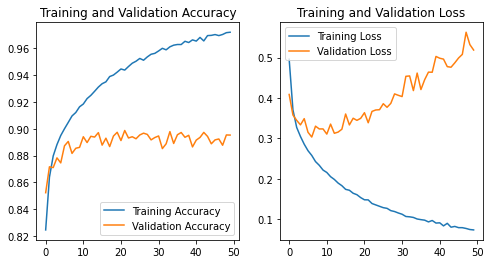

In [38]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()